In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ImportError: DLL load failed while importing _path: The specified module could not be found.

In [ ]:
df=pd.read_csv(r'/Expanded_data_with_more_features.csv.zip')

In [ ]:
# displaying first 5 rows
df.head(5)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [ ]:
# describing only numeric values which perform statistical calculations from data frame
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [ ]:
# overview of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [ ]:
# find out null values
df.isna().sum()

,0
Unnamed: 0,0
Gender,0
EthnicGroup,1840
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572


In [ ]:
print(df.columns)


Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')


# Gender Distrubution


In [ ]:
# by calculating the percentage distribution:
gender_counts = df['Gender'].value_counts(normalize=True)*100
print(gender_counts)

Gender
female    50.337783
male      49.662217
Name: proportion, dtype: float64


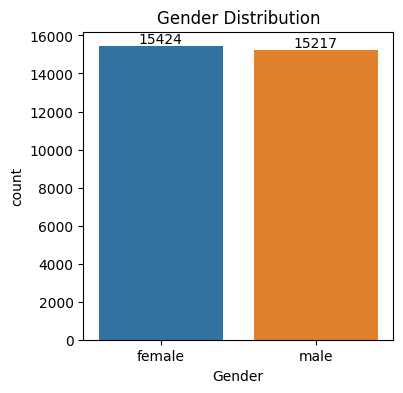

In [ ]:
plt.figure(figsize=(4,4))
ax = sns.countplot(data=df, x='Gender', hue='Gender')
plt.title('Gender Distribution')

# Loop through each container to label the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()




plt.show()

## ***Insight:)*** Above chart providing  that the count of females is slightly higher than that of males in the dataset.

# ***2.Is their any parentseducation effect on students score?***

In [ ]:
ps = df.groupby("ParentEduc")[["MathScore", "ReadingScore", "WritingScore"]].mean()
ps

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


# **Is their any impact of parent education on student scores?**

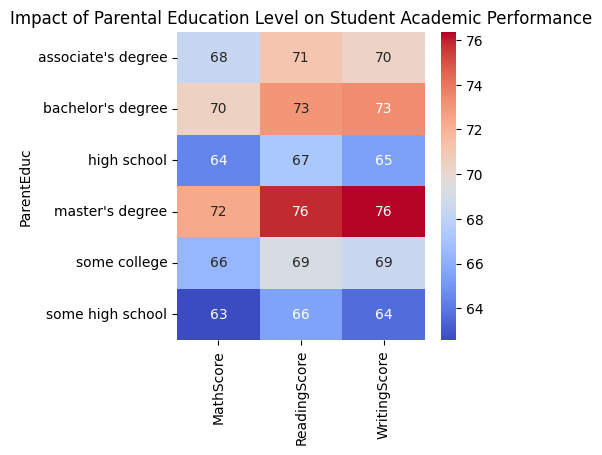

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(ps,annot=True,cmap='coolwarm')
plt.title("Impact of Parental Education Level on Student Academic Performance")
plt.show()

# The above chart concludes the parental education may play a significant role in influencing student achievements.

# ***3.Is their any parents marital status effect on students score?***

In [ ]:
ps1= df.groupby("ParentMaritalStatus")[["MathScore", "ReadingScore", "WritingScore"]].mean()
ps1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


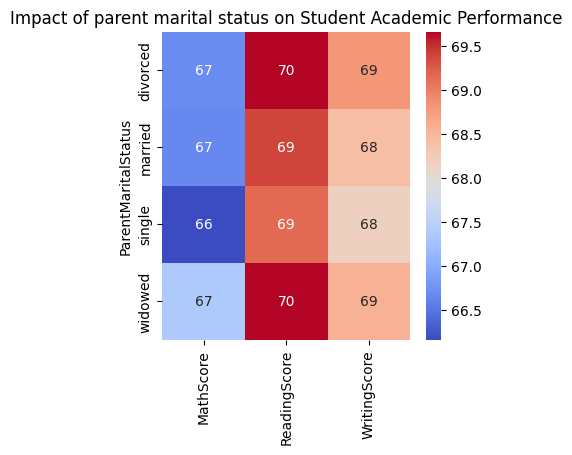

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(ps1,annot=True,cmap='coolwarm')
plt.title("Impact of parent marital status on Student Academic Performance")
plt.show()

# From the above chart we conclude Students from divorced or widowed families seem to perform slightly better on average, while those from single-parent families perform slightly worse, particularly in Math.

In [ ]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

# ***On which subject students score good?***

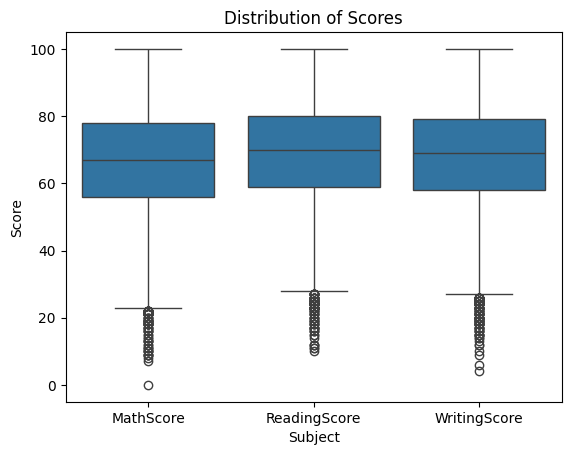

In [ ]:
import pandas as pd

# Melt the DataFrame
df_melted = df.melt(value_vars=['MathScore', 'ReadingScore', 'WritingScore'],
                    var_name='Subject',
                    value_name='Score')

# Plotting the combined boxplot
sns.boxplot(x='Subject', y='Score', data=df_melted)
plt.title('Distribution of Scores')
plt.show()


## from the above chart we conclude that  students are weaker in maths compare to remaining two subjects.

# **Distribution of Ethnic groups**

In [ ]:
# unique values in ethnic group
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


In [ ]:
groups=df['EthnicGroup'].value_counts(normalize=True)*100
print(groups)


EthnicGroup
group C    31.985001
group D    26.051179
group B    20.228464
group E    14.030763
group A     7.704594
Name: proportion, dtype: float64


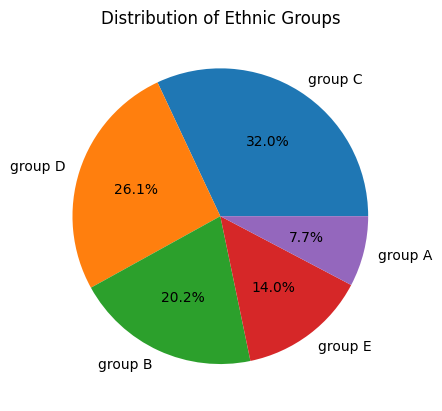

In [ ]:
plt.pie(groups,labels=groups.index,autopct='%1.1f%%')
plt.title('Distribution of Ethnic Groups')
plt.show()

## so,from above chart the distribution across ethinc groups, the highest distribution is group D i.e., 26.1%.

# **How does completing a test preparation program affect student performance in Math, Reading, and Writing?**

In [ ]:
avg_scores=df.groupby('TestPrep').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
avg_scores

,MathScore,ReadingScore,WritingScore
TestPrep,,,
completed,69.54666,73.732998,74.703265
none,64.94877,67.051071,65.092756


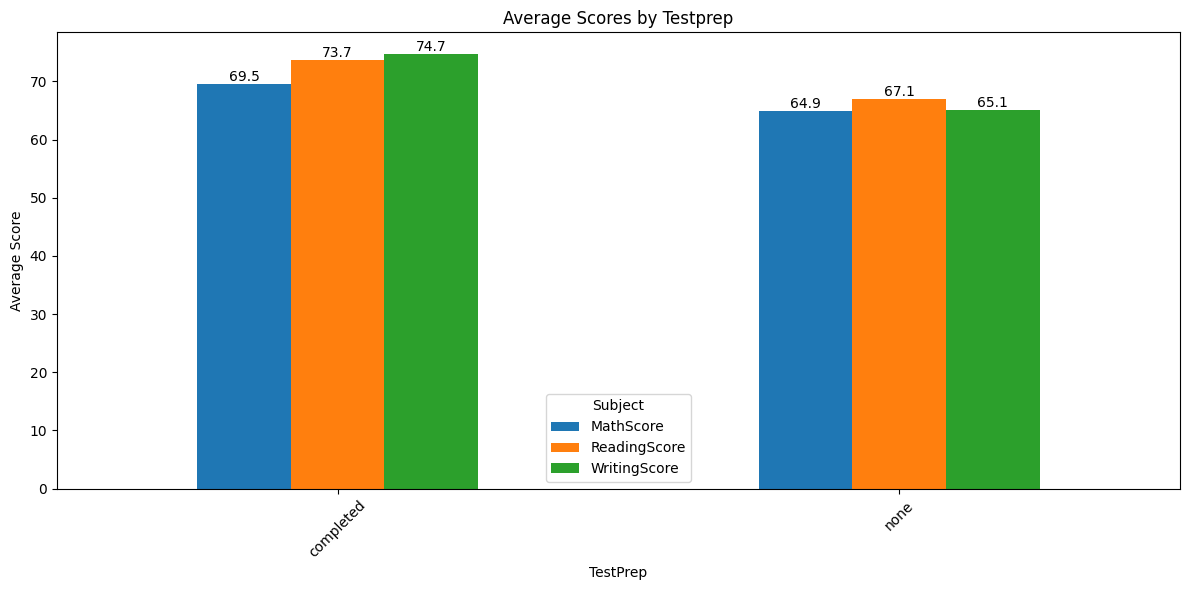

In [ ]:



# Plotting
ax = avg_scores.plot(kind='bar', figsize=(12, 6))
plt.title('Average Scores by Testprep')
plt.ylabel('Average Score')
plt.xlabel('TestPrep')
plt.xticks(rotation=45)
plt.legend(title='Subject')

# Adding value labels to bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


## The above chart  clearly explains that the Students who completed test preparation generally score higher in all subjects compared to those who did not.

In [ ]:
df.head(2)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88


# **Do first-born children perform better academically compared to their younger siblings**?

              MathScore  ReadingScore  WritingScore
IsFirstChild                                       
no            66.246832     69.132614     68.210887
yes           66.740646     69.542553     68.558484


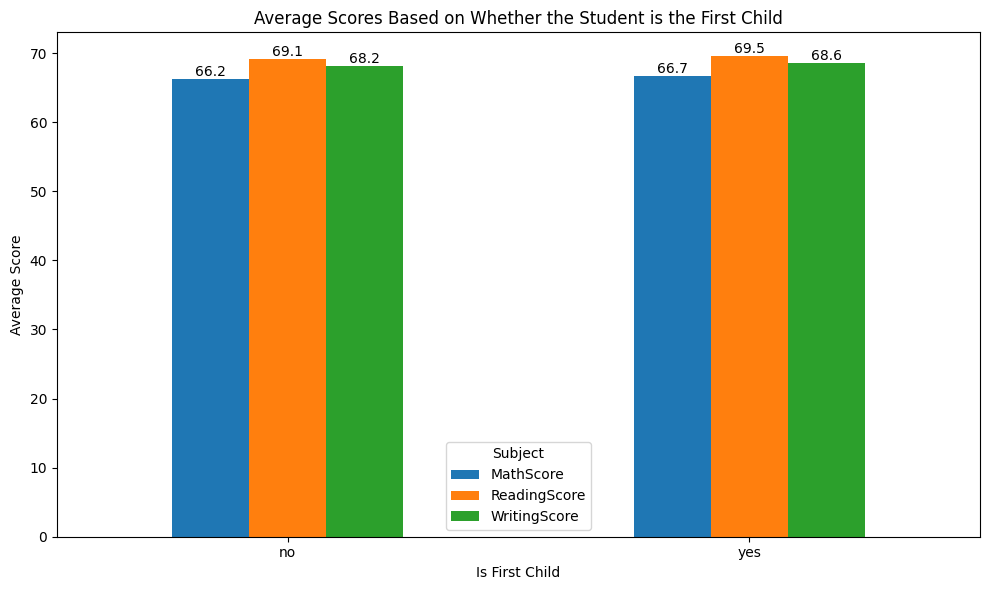

In [ ]:




# Group by IsFirstChild and calculate mean scores
first_child_scores = df.groupby('IsFirstChild').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
print(first_child_scores)

# Plotting the comparison chart
ax = first_child_scores.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Average Scores Based on Whether the Student is the First Child')
plt.ylabel('Average Score')
plt.xlabel('Is First Child')
plt.xticks(rotation=0)
plt.legend(title='Subject')

# Adding value labels to bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()



# From the bar chart the first child perform good scores in all subjects compare to their younger sibilings

# **"How does participation in sports (PracticeSport) affect students' academic performance in Math, Reading, and Writing?"**

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


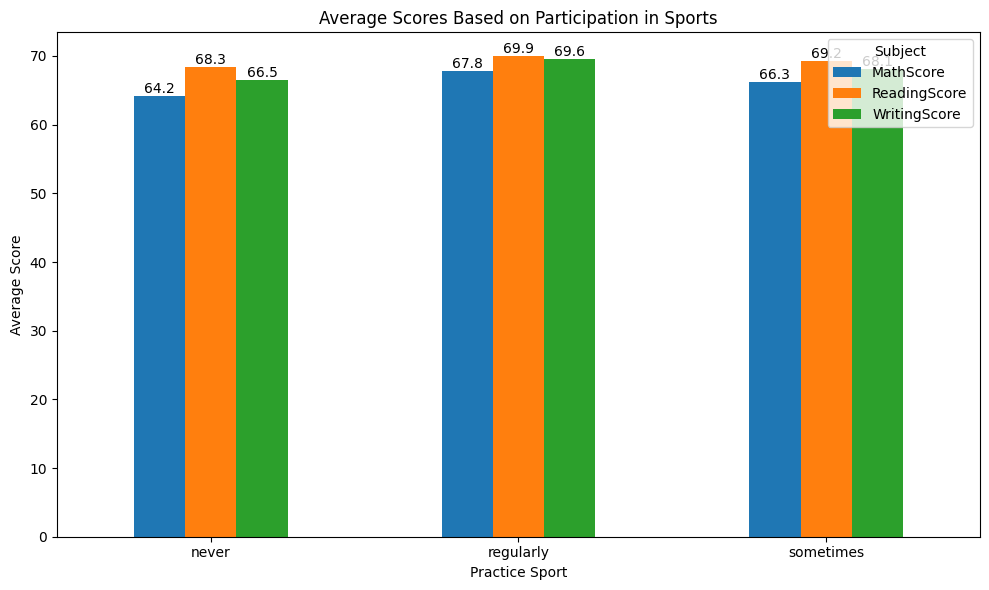

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by PracticeSport and calculate mean scores
sport_scores = df.groupby('PracticeSport').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
print(sport_scores)

# Plotting the bar chart
ax = sport_scores.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Average Scores Based on Participation in Sports')
plt.ylabel('Average Score')
plt.xlabel('Practice Sport')
plt.xticks(rotation=0)
plt.legend(title='Subject')

# Adding value labels to bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


# From above chart there is no effect on studies who are practising sports compare to non sport practiser

# **What is the relationship between weekly study hours (WklyStudyHours) and students' academic performance in Math, Reading, and Writing?**

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


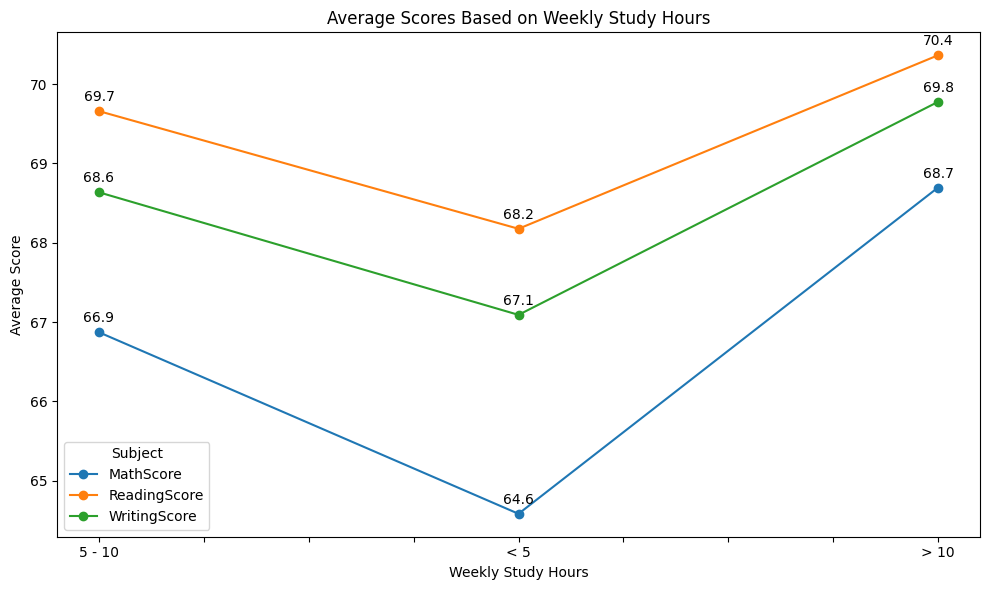

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by WklyStudyHours and calculate mean scores
study_hours_scores = df.groupby('WklyStudyHours').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
print(study_hours_scores)

# Plotting the line chart
ax = study_hours_scores.plot(kind='line', marker='o', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Average Scores Based on Weekly Study Hours')
plt.ylabel('Average Score')
plt.xlabel('Weekly Study Hours')
plt.xticks(rotation=0)
plt.legend(title='Subject')

# Adding value labels to points
for line in ax.lines:
    xdata = line.get_xdata()
    ydata = line.get_ydata()
    for x, y in zip(xdata, ydata):
        ax.annotate(f'{y:.1f}',
                    (x, y),
                    ha='center', va='bottom',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()


# This analysis suggests that dedicating more study time, especially over 10 hours per week, can lead to better academic performance, particularly in Math, Reading, and Writing. It highlights the importance of consistent and substantial study habits in achieving academic success.

# **Does the number of siblings (NrSiblings) a student has impact their academic performance in Math, Reading, and Writing?**

            MathScore  ReadingScore  WritingScore
NrSiblings                                       
0.0         66.819449     69.547812     68.746515
1.0         66.473896     69.259097     68.245345
2.0         66.554934     69.472018     68.522533
3.0         66.719092     69.488159     68.650498
4.0         66.245495     69.144169     68.073444
5.0         66.630303     69.453788     68.282576
6.0         65.917219     68.801325     67.860927
7.0         67.615120     69.828179     68.986254


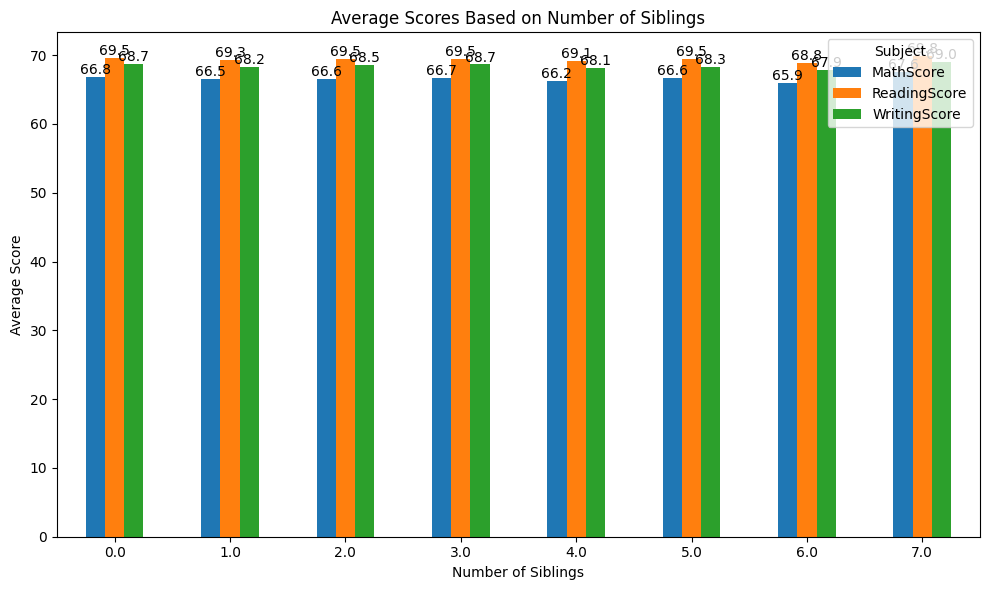

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by NrSiblings and calculate mean scores
siblings_scores = df.groupby('NrSiblings').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
print(siblings_scores)

# Plotting the bar chart
ax = siblings_scores.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Average Scores Based on Number of Siblings')
plt.ylabel('Average Score')
plt.xlabel('Number of Siblings')
plt.xticks(rotation=0)
plt.legend(title='Subject')

# Adding value labels to bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


# From the above chart clearly shows that their is slight difference in their academic scores while having sibilings.